# Decision Tree for Classification

## Train your first classification tree
In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.


* Import DecisionTreeClassifier from sklearn.tree.

* Instantiate a DecisionTreeClassifier dt of maximum depth equal to 6.

* Fit dt to the training set.

* Predict the test set labels and assign the result to y_pred.

In [10]:
import pandas as pd

# split the dataset into 80 and 20

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

# Prepare the features and target
# Use both 'radius_mean' and 'concave points_mean' as features
X = df[['radius_mean', 'concave points_mean']]
# Use 'diagnosis' as the target variable (convert M/B to 1/0)
y = df['diagnosis'].map({'M': 1, 'B': 0})

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [11]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

SEED = 1

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 0 0 1 0]


! You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set.

## Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.



* Predict the test set labels and assign the obtained array to y_pred.

* Evaluate the test set accuracy score of dt by calling accuracy_score() and assign the value to acc.

In [12]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


## Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise, as well as the function plot_labeled_decision_regions() are available in your workspace.


* Import LogisticRegression from sklearn.linear_model.

* Instantiate a LogisticRegression model and assign it to logreg.

* Fit logreg to the training set.

* Review the plot generated by plot_labeled_decision_regions().

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plot_labeled_decision_regions function
def plot_labeled_decision_regions(X, y, models):
    """
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
    
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
    """
    
    if len(models) != 2:
        raise ValueError("Please provide exactly two models in the list")
    
    # Create a mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Create figure with subplots
    fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
    
    for idx, model in enumerate(models):
        # Plot decision regions
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axarr[idx].contourf(xx, yy, Z, alpha=0.4)
        
        # Scatter plot of the actual data points
        scatter = axarr[idx].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')
        
        axarr[idx].set_xlabel(X.columns[0])
        axarr[idx].set_ylabel(X.columns[1])
        axarr[idx].set_title(f'Decision Regions - {model.__class__.__name__}')
    
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


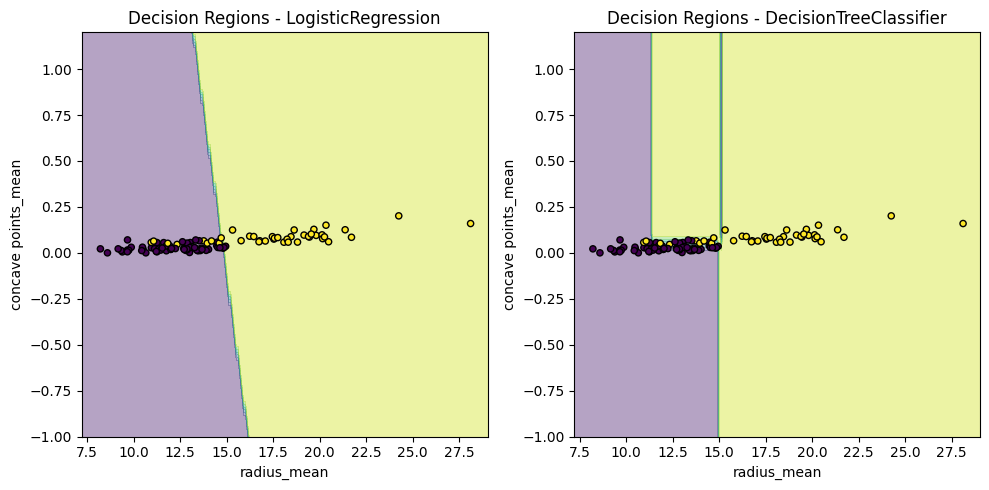

In [20]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

# Classification-Tree Learning

## Using entropy as a criterion
In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.


* Import DecisionTreeClassifier from sklearn.tree.

* Instantiate a DecisionTreeClassifier dt_entropy with a maximum depth of 8.

* Set the information criterion to 'entropy'.

* Fit dt_entropy on the training set.

In [23]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

## Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

* Import accuracy_score from sklearn.metrics.
* Predict the test set labels of dt_entropy and assign the result to y_pred.
* Evaluate the test set accuracy of dt_entropy and assign the result to accuracy_entropy.
* Review accuracy_entropy and accuracy_gini.

In [24]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [26]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


y_pred_gini = dt_gini.predict(X_test)
# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.886
Accuracy achieved by using the gini index: 0.921


 Notice how the two models achieve almost the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn

# Decision-Tree for Regression

## Train your first regression tree
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.


* Import DecisionTreeRegressor from sklearn.tree.
* Instantiate a DecisionTreeRegressor dt with maximum depth 8 and min_samples_leaf set to 0.13.
* Fit dt to the training set.

In [28]:
autompg = pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv")
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [31]:
# Data cleaning
# Replace '?' with NaN and convert to numeric
autompg['horsepower'] = pd.to_numeric(autompg['horsepower'], errors='coerce')

# Drop rows with missing values
autompg = autompg.dropna()

# Prepare features and target
X = autompg[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = autompg['mpg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (313, 7)
X_test shape: (79, 7)
y_train shape: (313,)
y_test shape: (79,)


In [32]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

## Evaluate the regression tree
In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.


* Import the function mean_squared_error as MSE from sklearn.metrics.
* Predict the test set labels and assign the output to y_pred.
* Compute the test set MSE by calling MSE and assign the result to mse_dt.
* Compute the test set RMSE and assign it to rmse_dt.

In [34]:
import numpy as np

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)
print("Test set MSE of dt: {:.2f}".format(mse_dt))


# Compute rmse_dt
rmse_dt = np.sqrt(mse_dt)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set MSE of dt: 18.63
Test set RMSE of dt: 4.32


## Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.


* Predict test set labels using the linear regression model (lr) and assign the result to y_pred_lr.

* Compute the test set MSE and assign the result to mse_lr.

* Compute the test set RMSE and assign the result to rmse_lr.

In [36]:
from sklearn.linear_model import LinearRegression

# Instantiate and fit Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)#

LinearRegression()

In [37]:
import numpy as np

# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = np.sqrt(mse_lr)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 3.47
Regression Tree test set RMSE: 4.32
